# Symptoms Based Disease Predition and Its Treatments
A Bangkit Final Project proposed by B21-CAP0170

There are a lot of diseases that you need to detect at an early stage to be able to identify the treatment plan early on and help the patient secure a good way to live. An early detection of disease and a precise diagnosis allows for quicker action, saving precious time, and to prevent complications and rapid worsening. Health practitioners have conducted surveys and collected data on patient information, their disease, and symptoms that allow them to distinguish the patient's disease with common symptoms. Therefore, the data set can be used to train the model that predicts the disease based on the symptoms.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Read the dataset csv file
df = pd.read_csv("Dataset/dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure()
# diseases.plot(kind='bar')

In [4]:
# Filter DataFrame to disease only (delete all symptom columns)
disease_only = df
for a in range(1, 18):
    disease_only = disease_only.drop([df.columns[a]], axis=1)

disease_only.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [5]:
# Put all unique disease to a list
disease = []

for x in disease_only['Disease'].tolist():
    if x not in disease:
        disease.append(x)

print(disease)

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Brain hemorrhage', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemorrhoids', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', 'Benign paroxysmal positional vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [6]:
# Print the total number of the diseases in the dataset
print(len(disease))

41


In [7]:
# Filter DataFrame to symptoms only (delete the disease column)
first_column = df.columns[0]
symptoms_only = df.drop([first_column], axis=1)

# Saving to new file
# df.to_csv('file.csv', index=False)

symptoms_only.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Put all unique symptoms to a list
symptoms = []

for i in range(1, 18):
    for x in symptoms_only[f'Symptom_{i}'].tolist():
        if str(x) != 'nan' and str(x).strip() not in symptoms:
            symptoms.append(x.strip())


print(symptoms)

['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'vomiting', 'indigestion', 'muscle_wasting', 'patches_in_throat', 'fatigue', 'weight_loss', 'sunken_eyes', 'cough', 'headache', 'chest_pain', 'back_pain', 'weakness_in_limbs', 'chills', 'joint_pain', 'yellowish_skin', 'constipation', 'pain_during_bowel_movements', 'breathlessness', 'cramps', 'weight_gain', 'mood_swings', 'neck_pain', 'muscle_weakness', 'stiff_neck', 'pus_filled_pimples', 'burning_micturition', 'bladder_discomfort', 'high_fever', 'nodal_skin_eruptions', 'ulcers_on_tongue', 'loss_of_appetite', 'restlessness', 'dehydration', 'dizziness', 'weakness_of_one_body_side', 'lethargy', 'nausea', 'abdominal_pain', 'pain_in_anal_region', 'sweating', 'bruising', 'cold_hands_and_feets', 'anxiety', 'knee_pain', 'swelling_joints', 'blackheads', 'foul_smell_of_urine', 'skin_peeling', 'blister', 'dischromic_patches', 'watering_from_eyes', 'extra_marital_contacts', 'diarrhoea', 'loss_of_balance', 'blur

In [9]:
# Print the total number of the symptoms in the dataset
print(len(symptoms))

131


In [10]:
# Get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [11]:
# Turns all columns in 'cols' to variable column.
# The number of rows of tmp DataFrame is 17x from the original DataFrame

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )

# Adding a value to each symptoms column by 1
tmp['add_value'] = 1
tmp.head()

,index,variable,value,add_value
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [12]:
# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add_value',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'label',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
pd.set_option('display.max_columns', 150)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [13]:
# Split dataset for training 70% and test 30%
train_7 = diseases.sample(frac = 0.7, random_state = 1)
test_7 = diseases.drop(index = train_7.index)

# Split dataset for training 80% and test 20%
train_8 = diseases.sample(frac = 0.8, random_state = 1)
test_8 = diseases.drop(index = train_8.index)

# Split dataset for training 90% and test 10%
train_9 = diseases.sample(frac = 0.9, random_state = 1)
test_9 = diseases.drop(index = train_9.index)

train = train_7
test = test_7

x_train, y_train, x_test, y_test =  train.drop('label', axis = 1),\
                                    train['label'],\
                                    test.drop('label', axis = 1),\
                                    test['label']

In [14]:
x_test

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [15]:
pd.crosstab(train['label'], columns = 'n')

col_0,n
label,
AIDS,87
Acne,89
Alcoholic hepatitis,70
Allergy,81
Arthritis,86
Benign paroxysmal positional vertigo,86
Brain hemorrhage,85
Bronchial Asthma,79
Cervical spondylosis,82


In [16]:
len(train['label'].unique())

41

In [17]:
pd.crosstab(test['label'], columns = 'n')

col_0,n
label,
AIDS,33
Acne,31
Alcoholic hepatitis,50
Allergy,39
Arthritis,34
Benign paroxysmal positional vertigo,34
Brain hemorrhage,35
Bronchial Asthma,41
Cervical spondylosis,38


In [18]:
len(test['label'].unique())

41

# Random Forest Classifier Algorithm

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_result = rfc.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=rfc_result))
print("Accuracy of this algorithm:")
print(str(accuracy_score(y_test, rfc_result)*100))

                                      precision    recall  f1-score   support

                                AIDS       1.00      1.00      1.00        33
                                Acne       1.00      1.00      1.00        31
                 Alcoholic hepatitis       1.00      1.00      1.00        50
                             Allergy       1.00      1.00      1.00        39
                           Arthritis       1.00      1.00      1.00        34
Benign paroxysmal positional vertigo       1.00      1.00      1.00        34
                    Brain hemorrhage       1.00      1.00      1.00        35
                    Bronchial Asthma       1.00      1.00      1.00        41
                Cervical spondylosis       1.00      1.00      1.00        38
                         Chicken pox       1.00      1.00      1.00        38
                 Chronic cholestasis       1.00      1.00      1.00        33
                         Common Cold       1.00      1.00      

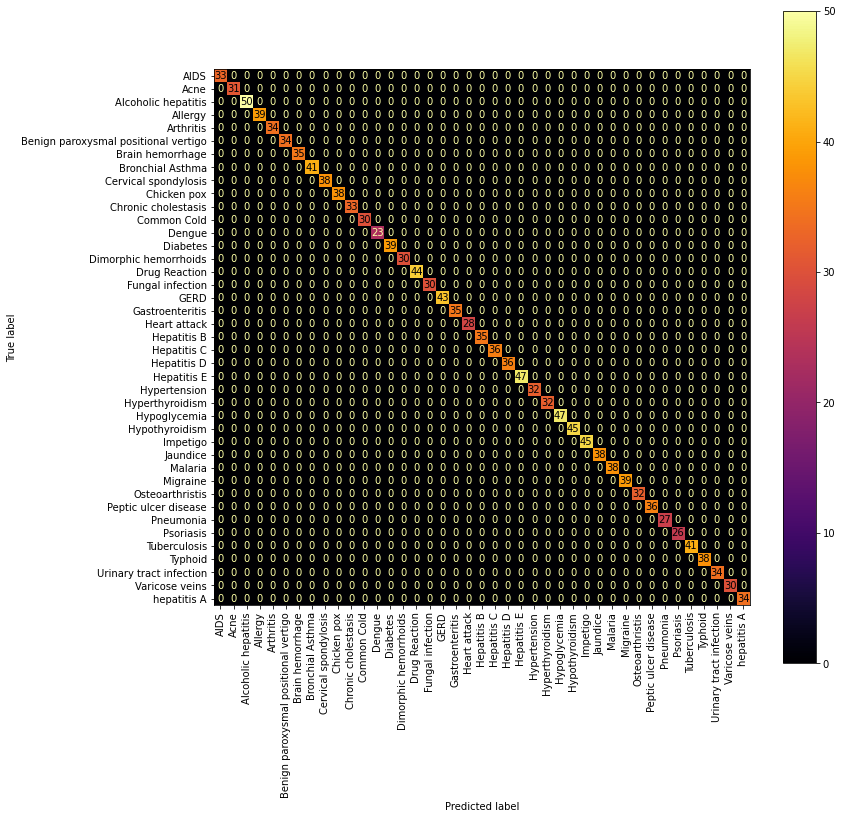

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = plot_confusion_matrix(rfc, x_test, y_test, ax=ax, cmap='inferno', xticks_rotation='vertical')

In [21]:
# Create a Pickle File
pickle_out = open("randomforest.pkl", "wb")
pickle.dump(rfc, pickle_out)
pickle_out.close()

In [22]:
# Importing Pickle File
pickle_in = open("randomforest.pkl", "rb")
classifier = pickle.load(pickle_in)

In [23]:
rfc_result1 = classifier.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=rfc_result1))
print("Accuracy of this algorithm:")
print(str(accuracy_score(y_test, rfc_result1)*100) + ' %\n')

                                      precision    recall  f1-score   support

                                AIDS       1.00      1.00      1.00        33
                                Acne       1.00      1.00      1.00        31
                 Alcoholic hepatitis       1.00      1.00      1.00        50
                             Allergy       1.00      1.00      1.00        39
                           Arthritis       1.00      1.00      1.00        34
Benign paroxysmal positional vertigo       1.00      1.00      1.00        34
                    Brain hemorrhage       1.00      1.00      1.00        35
                    Bronchial Asthma       1.00      1.00      1.00        41
                Cervical spondylosis       1.00      1.00      1.00        38
                         Chicken pox       1.00      1.00      1.00        38
                 Chronic cholestasis       1.00      1.00      1.00        33
                         Common Cold       1.00      1.00      

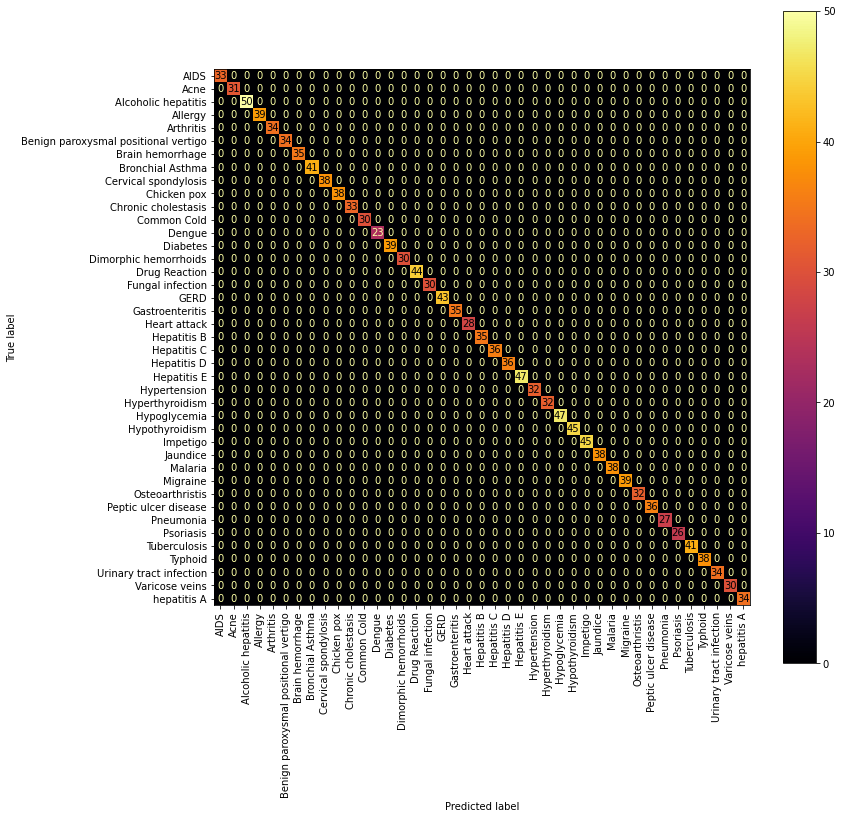

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = plot_confusion_matrix(classifier, x_test, y_test, ax=ax, cmap='inferno', xticks_rotation='vertical')

# Decision Tree Classifier Algorithm

In [25]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_result = dtc.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=dtc_result))
print("Accuracy of this algorithm:")
print(str(accuracy_score(y_test, dtc_result)*100))

                                      precision    recall  f1-score   support

                                AIDS       1.00      1.00      1.00        33
                                Acne       1.00      1.00      1.00        31
                 Alcoholic hepatitis       1.00      1.00      1.00        50
                             Allergy       1.00      1.00      1.00        39
                           Arthritis       1.00      1.00      1.00        34
Benign paroxysmal positional vertigo       1.00      1.00      1.00        34
                    Brain hemorrhage       1.00      1.00      1.00        35
                    Bronchial Asthma       1.00      1.00      1.00        41
                Cervical spondylosis       1.00      1.00      1.00        38
                         Chicken pox       1.00      1.00      1.00        38
                 Chronic cholestasis       1.00      1.00      1.00        33
                         Common Cold       1.00      1.00      

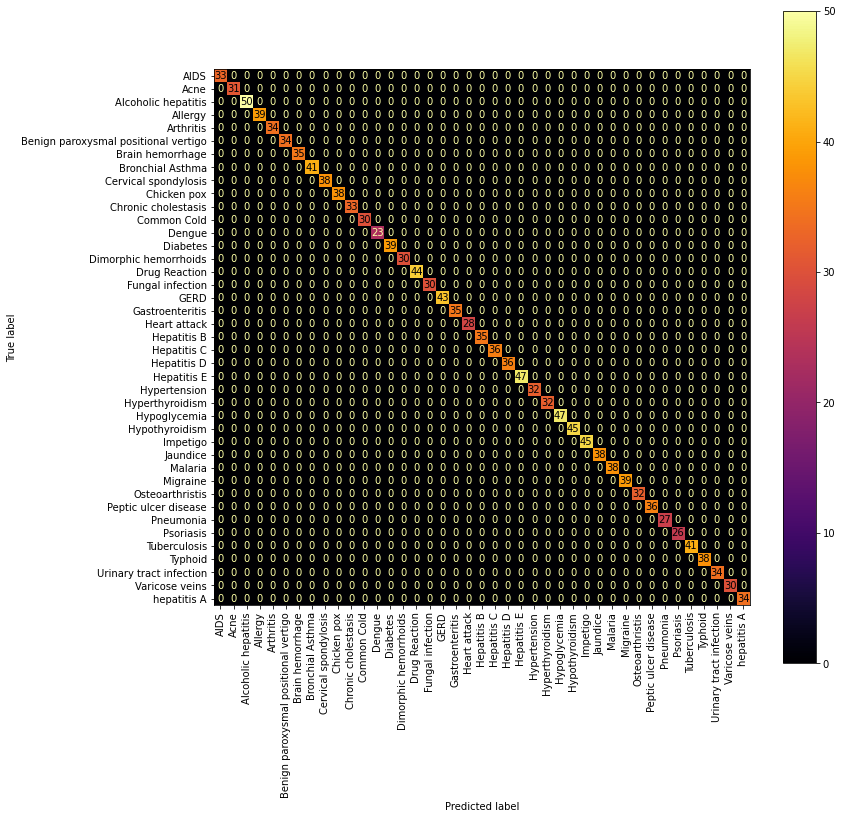

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = plot_confusion_matrix(dtc, x_test, y_test, ax=ax, cmap='inferno', xticks_rotation='vertical')

# KNearestNeighbour Algorithm

In [27]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train, y_train)
knn_result = knn.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=knn_result))
print("Accuracy of this algorithm:")
print(str(accuracy_score(y_test, knn_result)*100))

                                      precision    recall  f1-score   support

                                AIDS       1.00      1.00      1.00        33
                                Acne       1.00      1.00      1.00        31
                 Alcoholic hepatitis       1.00      1.00      1.00        50
                             Allergy       1.00      1.00      1.00        39
                           Arthritis       1.00      1.00      1.00        34
Benign paroxysmal positional vertigo       1.00      1.00      1.00        34
                    Brain hemorrhage       1.00      1.00      1.00        35
                    Bronchial Asthma       1.00      1.00      1.00        41
                Cervical spondylosis       1.00      1.00      1.00        38
                         Chicken pox       1.00      1.00      1.00        38
                 Chronic cholestasis       1.00      1.00      1.00        33
                         Common Cold       1.00      1.00      

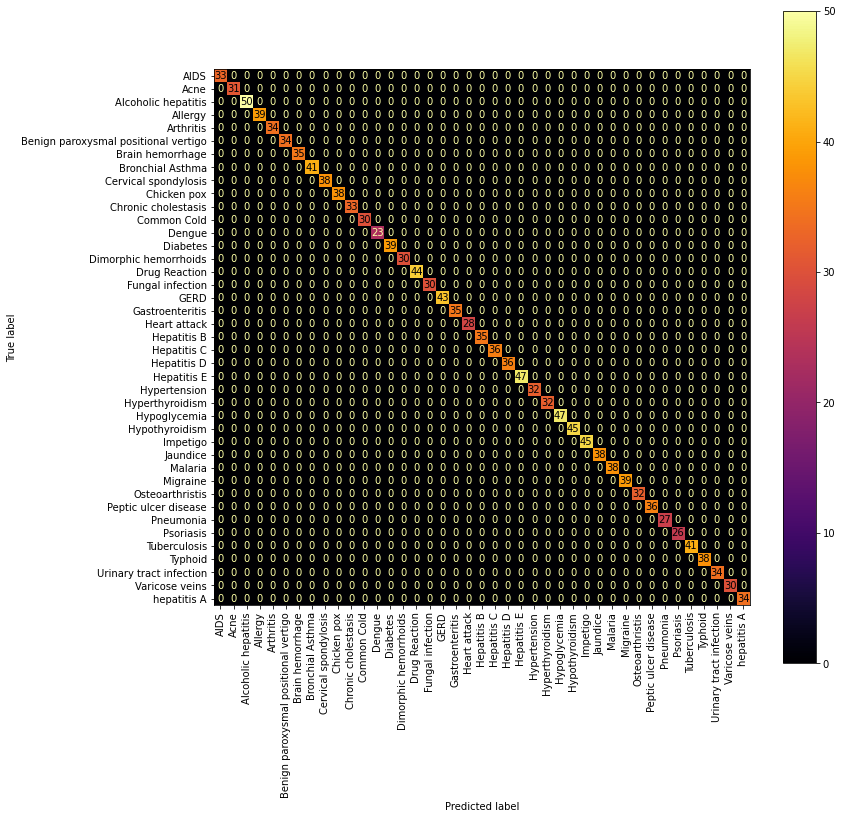

In [28]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = plot_confusion_matrix(knn, x_test, y_test, ax=ax, cmap='inferno', xticks_rotation='vertical')

# Naive Bayes Algorithm

In [29]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_result = knn.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=gnb_result))
print("Accuracy of this algorithm:")
print(str(accuracy_score(y_test, gnb_result)*100))

                                      precision    recall  f1-score   support

                                AIDS       1.00      1.00      1.00        33
                                Acne       1.00      1.00      1.00        31
                 Alcoholic hepatitis       1.00      1.00      1.00        50
                             Allergy       1.00      1.00      1.00        39
                           Arthritis       1.00      1.00      1.00        34
Benign paroxysmal positional vertigo       1.00      1.00      1.00        34
                    Brain hemorrhage       1.00      1.00      1.00        35
                    Bronchial Asthma       1.00      1.00      1.00        41
                Cervical spondylosis       1.00      1.00      1.00        38
                         Chicken pox       1.00      1.00      1.00        38
                 Chronic cholestasis       1.00      1.00      1.00        33
                         Common Cold       1.00      1.00      

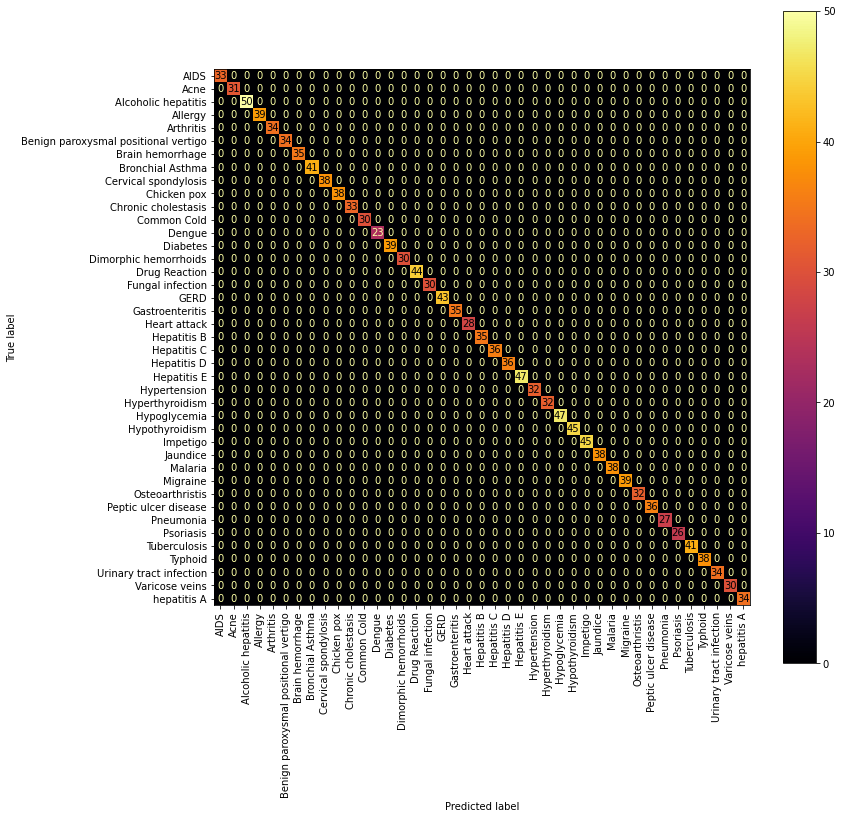

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = plot_confusion_matrix(gnb, x_test, y_test, ax=ax, cmap='inferno', xticks_rotation='vertical')